<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/DroughtPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/ERA5_COMBINED/201505-202309.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
0,0,201505,9.208,37.505,292.818,283.608,305.405,286.220,0.021006,0.000000,...,0.179231,0.164235,NaN,NaN,4797.35,2689.45,295.875,0.000001,-0.833514,-0.913074
1,1,201505,9.657,37.505,292.839,283.988,305.404,286.520,0.020244,0.000000,...,0.178913,0.161112,NaN,NaN,4676.50,2863.50,295.602,0.000002,-0.970380,-0.844767
2,2,201505,3.369,37.056,292.296,284.591,306.343,286.849,0.011030,0.000000,...,0.097784,0.088205,NaN,NaN,4307.48,2740.11,295.231,0.000012,-1.704530,-1.869160
3,3,201505,3.818,37.056,292.105,284.314,306.379,286.606,0.012269,0.000000,...,0.119543,0.105292,NaN,NaN,4247.37,2708.59,295.290,0.000013,-1.726370,-1.874620
4,4,201505,4.267,37.056,291.855,283.943,306.398,286.190,0.018120,0.000000,...,0.153508,0.128331,NaN,NaN,4154.62,2681.86,295.341,0.000012,-1.751720,-1.920560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352991,13391,202309,19.988,-35.259,287.069,279.898,294.821,281.649,0.094790,0.000000,...,0.187951,0.213317,0.024678,0.025565,6111.18,3565.15,289.527,NaN,2.932740,1.531950
1352992,13392,202309,37.505,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352993,13393,202309,37.954,-46.937,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352994,13394,202309,37.505,-47.386,277.159,273.141,282.514,274.021,0.100942,0.000121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,surface_net_solar_radiation_sum,total_evaporation_sum,soil_moisture_am,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
count,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,...,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06,1.343574e+06
mean,6.694369e+03,2.019104e+05,1.835494e+01,6.140160e+00,2.977136e+02,2.887980e+02,3.074406e+02,2.836288e+02,5.371258e-02,5.610176e-05,...,4.814407e+08,-4.307127e-02,1.528226e-01,1.458586e-01,3.422366e+03,2.135652e+03,2.985960e+02,2.594840e-05,-6.525675e-01,-7.696680e-01
std,3.861365e+03,2.448551e+02,1.585372e+01,1.769192e+01,5.726020e+00,6.662258e+00,5.699955e+00,8.845810e+00,9.029368e-02,2.444202e-04,...,1.029031e+08,4.426884e-02,1.288292e-01,1.167535e-01,2.355225e+03,1.416118e+03,5.658649e+00,4.226461e-05,1.346713e+00,1.288187e+00
min,0.000000e+00,2.015050e+05,-1.729300e+01,-3.436100e+01,2.707980e+02,2.563230e+02,2.818050e+02,2.565430e+02,1.627390e-05,0.000000e+00,...,1.429790e+06,-2.071280e-01,2.000000e-02,2.000280e-02,-8.812710e+02,-1.516340e+02,2.777050e+02,0.000000e+00,-5.000000e+00,-5.000000e+00
25%,3.347000e+03,2.017060e+05,7.411000e+00,-7.411000e+00,2.944880e+02,2.846660e+02,3.035650e+02,2.762010e+02,2.224193e-04,0.000000e+00,...,4.245380e+08,-8.556322e-02,5.047583e-02,5.630620e-02,1.123830e+03,8.493680e+02,2.956130e+02,5.422580e-08,-1.504370e+00,-1.613150e+00
50%,6.697000e+03,2.019070e+05,1.998800e+01,9.208000e+00,2.981650e+02,2.904160e+02,3.071220e+02,2.842720e+02,6.243600e-03,0.000000e+00,...,4.908980e+08,-2.499820e-02,1.057045e-01,9.825510e-02,2.812930e+03,1.679520e+03,2.990700e+02,3.628700e-06,-6.761600e-01,-8.520455e-01
75%,1.003500e+04,2.021080e+05,3.031800e+01,2.043700e+01,3.013150e+02,2.939830e+02,3.116750e+02,2.917790e+02,7.572175e-02,1.051998e-06,...,5.471540e+08,-2.562160e-03,2.220380e-01,2.101890e-01,5.492880e+03,3.270290e+03,3.022350e+02,3.586527e-05,2.426100e-01,6.797185e-02
max,1.338300e+04,2.023090e+05,5.142900e+01,3.750500e+01,3.139530e+02,3.039010e+02,3.231840e+02,3.005000e+02,1.790260e+00,1.399220e-02,...,8.944310e+08,-2.829560e-04,6.888350e-01,6.773250e-01,8.889260e+03,6.461520e+03,3.141030e+02,3.989610e-04,5.000000e+00,5.000000e+00


In [16]:
dataset.isna().sum()

Unnamed: 0                              0
Month                                   0
Lat                                     0
Lon                                     0
temperature_2m                          0
temperature_2m_min                      0
temperature_2m_max                      0
dewpoint_temperature_2m                 0
total_precipitation_sum                 0
total_precipitation_min                 0
total_precipitation_max                 0
u_component_of_wind_10m                 0
v_component_of_wind_10m                 0
surface_net_solar_radiation_sum         0
total_evaporation_sum                   0
soil_moisture_am                     7124
soil_moisture_pm                     6958
soil_moisture_am_anomaly           135833
soil_moisture_pm_anomaly           133961
NDVI                                 3326
EVI                                  3326
next_month_tempreature               2727
next_month_precipitation             4343
spei01                            

In [17]:
dataset = dataset.drop(["soil_moisture_am_anomaly", "soil_moisture_pm_anomaly"], axis = 1)

In [18]:
dataset.dropna(subset=['spei01', 'spei03', 'next_month_precipitation', 'next_month_tempreature', 'EVI', 'NDVI', "soil_moisture_am", "soil_moisture_pm"], inplace=True)

In [19]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
dtype: int64

In [20]:
len(dataset)

1343574

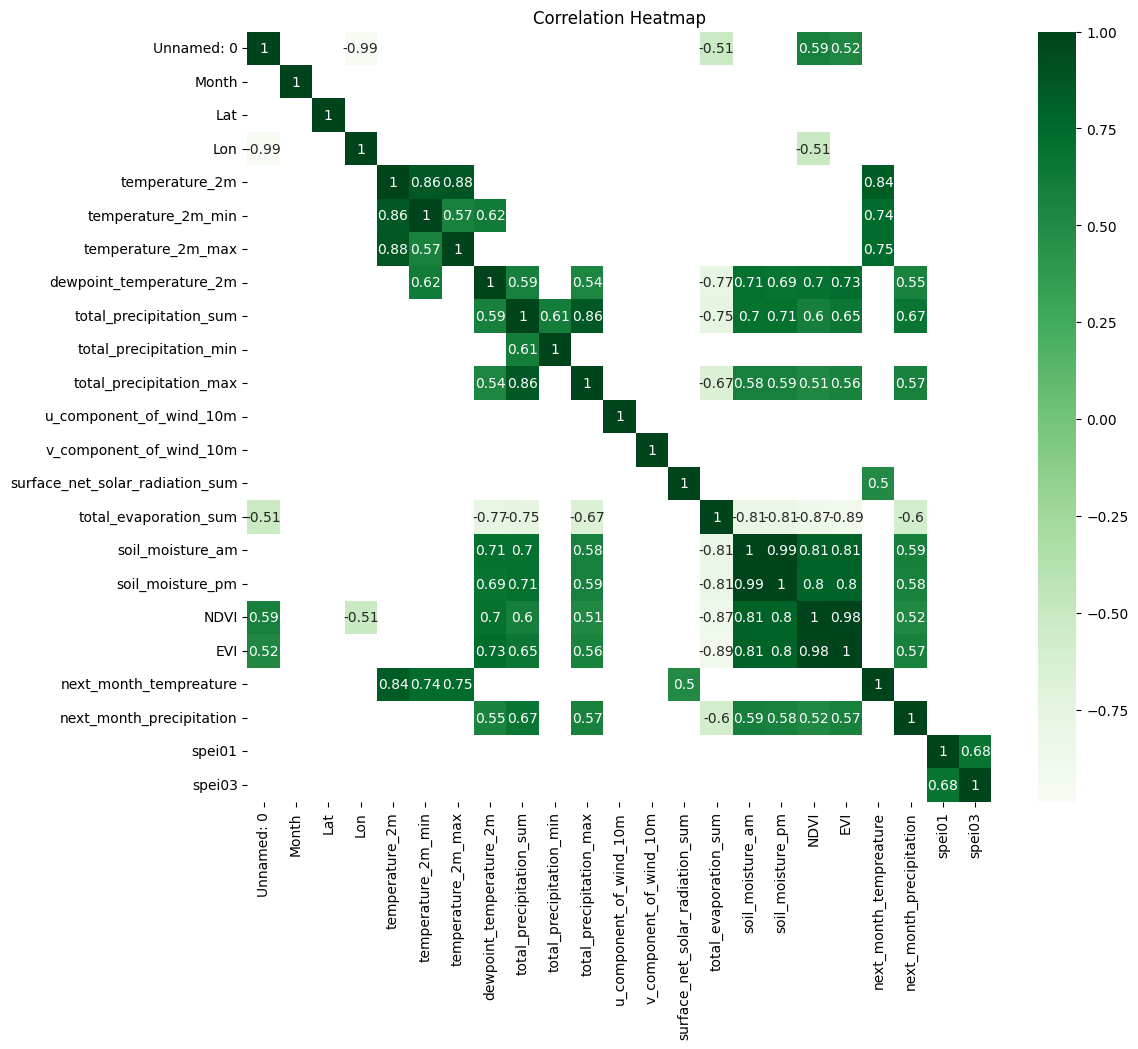

In [26]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()